# **Optimizing Candidate Selection Using Recruitment Data - Modeling - Hector Sanchez**

**Modeling Plan**

1. Introduction

   Objective: Our focus is to develop a predictive model that assesses candidates based on key features, which will help leaders prioritize those candidates who align well with teh company's hiring patterns. The main purpose of this notebook is to build, evaluate, and select the best predictive model that will help us optimize candidate selection. Each model will be evaluated based on accuracy, precision, and recall scores to select the best performing model.  
   
2. Load the Preprocessed Data

   Objective: We will start by loading the preprocessed datasets that we saved in our previous notebook. Each of these datasets have been cleaned, encoded, and scaled. We will also ensure to import the necessary libraries/packages in this step so that we have them ready to use throughout the rest of our notebook. 
   
3. Build a Baseline Model

   Objective: Next, we'll continue with building a baseline model that is simple in nature, and then evaluate it's performance on tht test set. Doing so we essentially set a performance benchmark for more complex models. We'll start by using a Logistic Regression model for classification. This baseline model will help us determine if we have any issues in future steps since our more advanced models should outperform the baseline. 
   
4. Model Building

   Objective: In this step we will choose 2 different models. The three models of interest are Random Forest Classifier, and a Support Vector Classifier. By utilizing these 2 models, I'll be ensuring that I consider a range of approaches to the problem. Training these 2 models will help me understand how they perform which will help me decide which is best suited for hyperparameter tuning. 
   
5. Hyperparameter Tuning

   Objective: In this step, GridSearchCV will help optimize the parameters of the best performing models. This step will help with balancing any potential underfitting or overfiting that may occur. 
   
6. Evaluate Each Model's Performance

   Objective: The main focus of this step is to evaluate every model by using standardized metrics and compare their performance. We'll be evaluating performance based on accuracy, precision, recall, and F1-score. We'll also include a confusion matrix to serve as a visualization of our evaluation metrics. 
   
7. Select the Final/Best Model

   Objective: In this step, we'll start by summarizing the performance of each model. It's critical to explain/justify the selection of the final model, and I'll ensure to do so based on the evaluation metrics. The final model that I select needs to align well with the goal of optimiizing candidate selection, and maximize predictive accuracy. 
   
8. Save the Final/Best Model

   Objective: This final step is important so that we have the model readily available for future use. This allows for reproducibility and is crucial for downstream applications. 

**Load the Preprocessed Data**

In [12]:
# First, we'll start by loading the necessary libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Next, we'll load the preprocessed and scaled datasets that were saved at the end of our last notebook
# Load the datasets

file_path = 'C:/Users/hecsa/Springboard/Springboard Github/Springboard/Data Science Capstone Three/datasets/final_preprocessed_data.csv'
recruitment_data_preprocessed = pd.read_csv(file_path)

X_train = pd.read_csv('C:/Users/hecsa/Springboard/Springboard Github/Springboard/Data Science Capstone Three/datasets/X_train.csv')
X_test = pd.read_csv('C:/Users/hecsa/Springboard/Springboard Github/Springboard/Data Science Capstone Three/datasets/X_test.csv')
y_train = pd.read_csv('C:/Users/hecsa/Springboard/Springboard Github/Springboard/Data Science Capstone Three/datasets/y_train.csv')
y_test = pd.read_csv('C:/Users/hecsa/Springboard/Springboard Github/Springboard/Data Science Capstone Three/datasets/y_test.csv')

In [16]:
# Call .dtypes on X_train to inspect the data types of each feature

X_train.dtypes

Age                                 float64
ExperienceYears                     float64
PreviousCompanies                   float64
DistanceFromCompany                 float64
InterviewScore                      float64
SkillScore                          float64
PersonalityScore                    float64
Strategy_Aggressive                    bool
Strategy_Moderate                      bool
Strategy_Conservative                  bool
Gender_Male                            bool
EducationLevel_Bachelor's Type 2       bool
EducationLevel_Master's                bool
EducationLevel_PhD                     bool
dtype: object

**Build a Baseline Model**

Baseline Model - Logistic Regression
Accurarcy: 0.9133
Precision: 0.8391
Recall: 0.8588
F1-Score: 0.8488

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       215
           1       0.84      0.86      0.85        85

    accuracy                           0.91       300
   macro avg       0.89      0.90      0.89       300
weighted avg       0.91      0.91      0.91       300



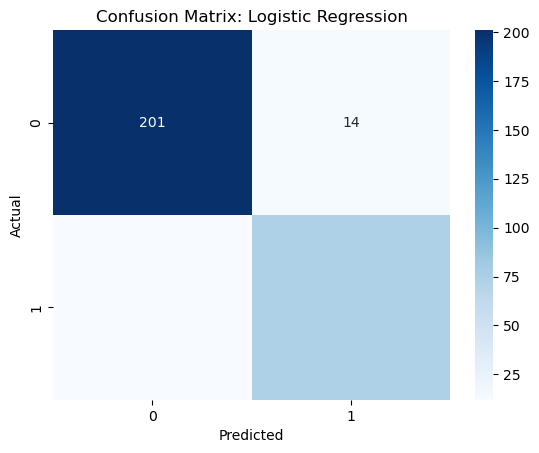

In [19]:
# Build a Baseline Model: Logistic Regression

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Utilize .predict() to predict on the test set

y_pred_log = log_model.predict(X_test)

# Evaluate the baseline model

print("Baseline Model - Logistic Regression")
print(f"Accurarcy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log, average='binary'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log, average='binary'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log, average='binary'):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Create a confusion matrix for the baseline model

conf_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Model Building**

Now that we have our Baseline Logistic Regression Model, we will continue with more Advanced modesl. As mentioned in the Modeling Plan breakdown, we will be using a Random Forest Classifier, and a Support Vector Classifier. We will display the evaluatin matrics, classification report, and confusion matrix for each model, just as we did with our Logistic Regression.

Random Forest Classifier Model

Random Forest Classifier
Accuracy: 0.9233
Precision: 0.8875
Recall: 0.8353
F1-Score: 0.8606

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       215
           1       0.89      0.84      0.86        85

    accuracy                           0.92       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.92      0.92      0.92       300



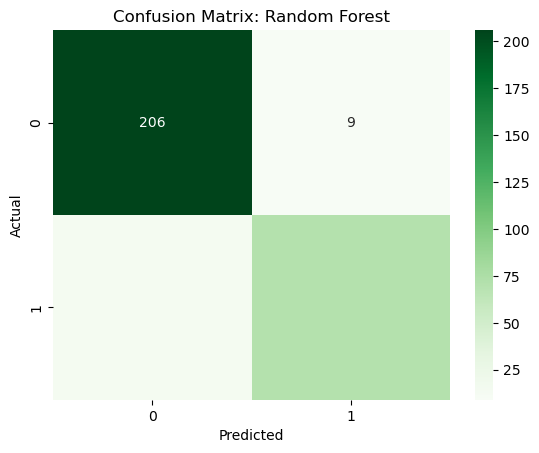

In [25]:
# Initialize Random Forest Classifier

rf_model = RandomForestClassifier(random_state=42)

# Train the rf_model by calling .fit()

rf_model.fit(X_train, y_train)

# Predict on the test set

y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest Classifier

print("Random Forest Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='binary'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='binary'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='binary'):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Create a Confusion matrix for the Random Forest Classifier

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Support Vector CLassifier Model

Support Vector Classifier
Accuracy: 0.9067
Precision: 0.8353
Recall: 0.8353
F1-Score: 0.8353

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       215
           1       0.84      0.84      0.84        85

    accuracy                           0.91       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.91      0.91      0.91       300



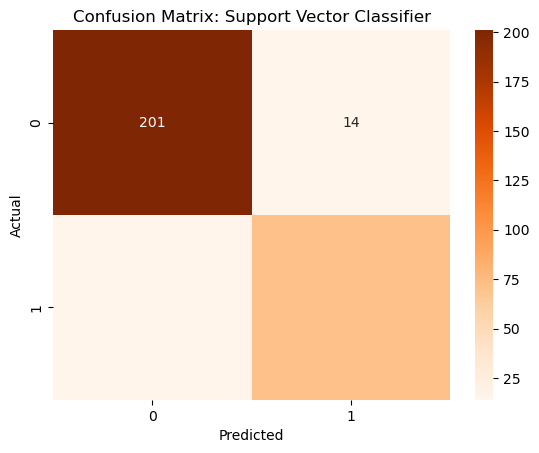

In [29]:
# Initialize Support Vector Classifier
svc_model = SVC(random_state=42)

# Train model
svc_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc_model.predict(X_test)

# Evaluate Support Vector Classifier
print("Support Vector Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svc, average='binary'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svc, average='binary'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svc, average='binary'):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))

# Confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(conf_matrix_svc, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix: Support Vector Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Hyperparameter Tuning**

Optimizing Random Forest Performance with GridSearchCV

In [33]:
# Create a parameter grid for Random Forest

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for Random Forest

grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

# Evaluate the best model

best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Best Random Forest Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_rf, average='binary'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_rf, average='binary'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best_rf, average='binary'):.4f}")

Best Random Forest Model
Accuracy: 0.9200
Precision: 0.8765
Recall: 0.8353
F1-Score: 0.8554


Optimizing Support Vector Classifier Performance with RandomizedSearchCV

In [36]:
# Create a parameter grid for SVC

param_dist_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# RandomizedSearchCV for SVC

random_svc = RandomizedSearchCV(estimator=SVC(random_state=42), param_distributions=param_dist_svc, cv=5, n_iter=10, scoring='f1')
random_svc.fit(X_train, y_train)

# Evaluate the best model

best_svc = random_svc.best_estimator_
y_pred_best_svc = best_svc.predict(X_test)

print("Best Support Vector Classifier Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_svc):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_svc, average='binary'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_svc, average='binary'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best_svc, average='binary'):.4f}")

Best Support Vector Classifier Model
Accuracy: 0.9100
Precision: 0.8295
Recall: 0.8588
F1-Score: 0.8439


**Evaluate Each Model's Performance**

In [64]:
# Create a model_metrics dictionary where we'll collect metrics for each model

model_metrics = {
    "Model": ["Logistic Regression", "Best Random Forest", "Best Support Vector Classifier"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svc)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log, average='binary'),
        precision_score(y_test, y_pred_rf, average='binary'),
        precision_score(y_test, y_pred_svc, average='binary')
    ],
    "Recall": [
        recall_score(y_test, y_pred_log, average='binary'),
        recall_score(y_test, y_pred_rf, average='binary'),
        recall_score(y_test, y_pred_svc, average='binary')
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_log, average='binary'),
        f1_score(y_test, y_pred_rf, average='binary'),
        f1_score(y_test, y_pred_svc, average='binary')
    ]
}

# Convert dictionary to DataFrame

metrics_df = pd.DataFrame(model_metrics)

Generate a Bar Chart

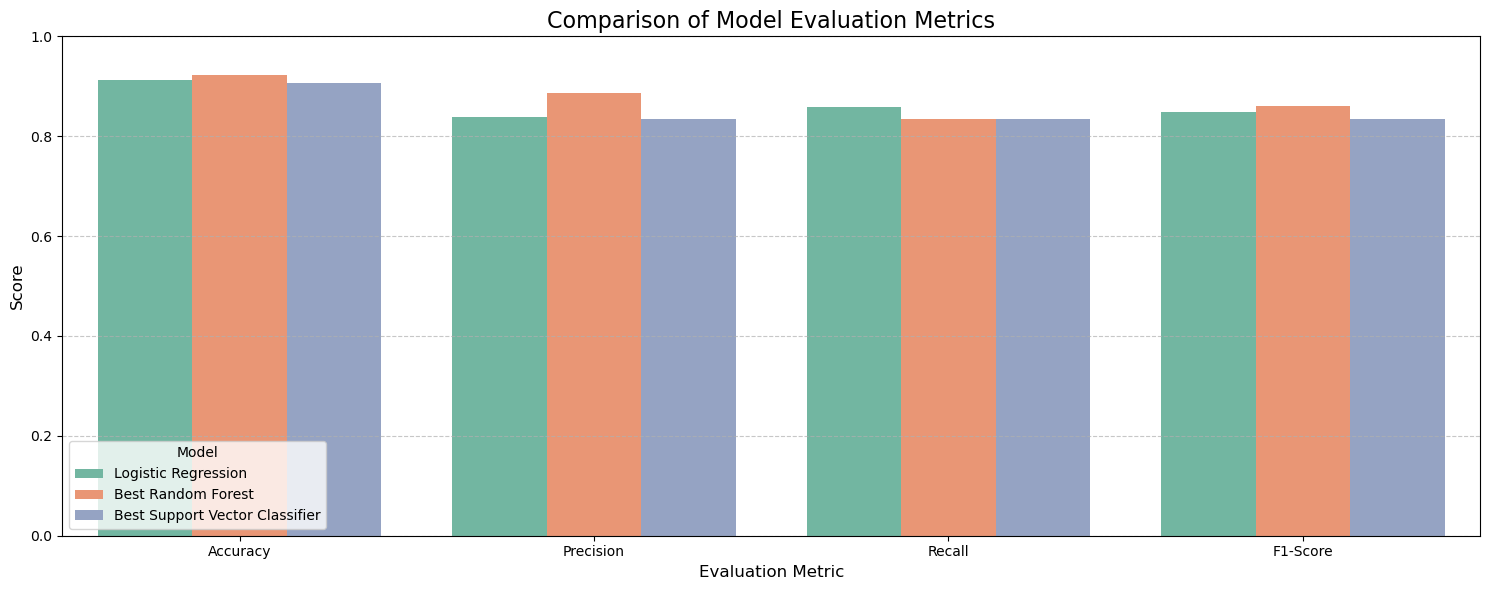

In [66]:
# Melt the DataFrame to make it easier for grouped bar plotting

metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot grouped bar chart

plt.figure(figsize=(15, 6))
sns.barplot(x="Metric", y="Score", hue="Model", data=metrics_melted, palette="Set2")

# Customize the plot

plt.title("Comparison of Model Evaluation Metrics", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Evaluation Metric", fontsize=12)
plt.ylim(0, 1)  # Metrics are in the range [0, 1]
plt.legend(title="Model", loc="lower left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show plot

plt.show()

Create and Display a Comparison Table of the Evaluation Metrics

In [68]:
# Display the comparison table

metrics_df.style.set_caption("Comparison of Model Evaluation Metrics").format(precision=3)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.913,0.839,0.859,0.849
1,Best Random Forest,0.923,0.887,0.835,0.861
2,Best Support Vector Classifier,0.907,0.835,0.835,0.835


**Select the Final/Best Model**

Now that we've reached the end of our modeling phase, it's time to select the best performing model. It seems that model performs well in it's own right, but we need to refocus on what the purpose of the project is before we choose a model.

The ultimate focus of this project has been to help hiring and operations managers make faster/effective hiring decisions. We've used recruitment data to ehlp us build a model that can predict a candidate's likelihood of being hireable based on their qualifications and demographic data. Since our focus is to help hiring/operationa managers hire as many suitable, but effective candidates as possible, a balanced model is a bigger priority. This means, that selecting our best model is a toss up between Logistic Regression and Random Forest.

BAsed on the goal of this project, we need a model that balances the accuracy of it's predictions with minimizing the onboarding of unsuitable candidates, while also minimizing the number of suitable candidates that were missed or not given a job offer. Based on each model's Accuracy, Precision, Recall, and F1-Score"
- The Random Forest model provides the highest Accuracy (0.923) and F1-Score (0.861), which makes it seem as the most balanced choice.
- However, it is worth noting that the Logistic Regression model has a slightly better Recall (0.859), which is more useful if we ONLY want to hire as many candidates as possible and not consider any other risk factors.

Ultimately, the best choice sems to be the Random Forest model stricly due to it's more balanced performance, which could prove to be more useful and flexible in future applications.

**Save the Final/Best Model**

In [72]:
# Saving the Random Forest model

joblib.dump(best_rf, 'tuned_random_forest_model.pkl')
print("Random Forest Model saved successfully!")

Random Forest Model saved successfully!
